In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-boundaries-heat)

First, we define functions for the PDE and each boundary condition.

In [2]:
phi = lambda t, x, u, ux, uxx: uxx
ga = lambda u, ux: u
gb = lambda u, ux: u - 2

Our next step is to write a function to define the initial condition. This one satisfies the boundary conditions exactly.

In [3]:
init = lambda x: 1 + sin(pi * x/2) + 3 * (1 - x**2) * exp(-4*x**2)

Now we can use {numref}`Function {number} <function-parabolic>` to solve the problem.

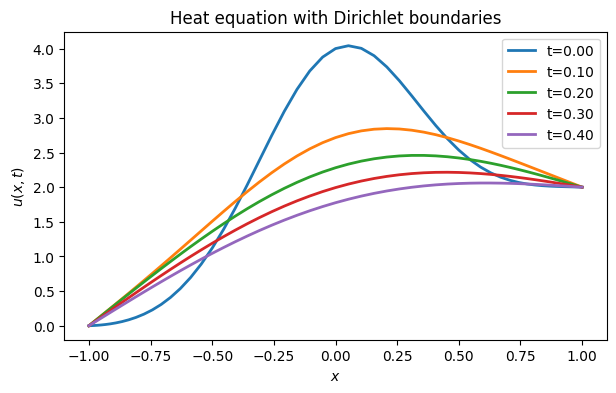

In [4]:
x, u = FNC.parabolic(phi, (-1, 1), 60, ga, gb, (0, 0.75), init)

for t in arange(0,0.5,0.1):
    plot(x, u(t), label=f"t={t:.2f}")
xlabel("$x$"),  ylabel("$u(x,t)$")
legend()
title("Heat equation with Dirichlet boundaries");

In [5]:
from matplotlib.animation import FuncAnimation
fig = figure()
ax = fig.add_subplot(autoscale_on=False, xlim=(-1, 1), ylim=(0, 4.2))

line, = ax.plot([], [], '-')
ax.set_title("Heat equation with Dirichlet boundaries")
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def snapshot(t):
    line.set_data(x, u(t))
    time_text.set_text(f"t = {t:.2e}")
    return line, time_text

anim = FuncAnimation(fig, snapshot, frames=linspace(0, 0.75, 201), blit=True)
anim.save("boundaries-heat.mp4", fps=30)
close()